In [1]:
import os
import json
import pickle
from util.data_loader import *
from util.plot import *

In [2]:
dir = os.getcwd()
data_dir = os.path.join(dir, 'data')
filename = 'names.json'
upper_threshold = 0.7
lower_threshold = 0.3
point = 20

In [3]:
sex_dict = load_name_data(data_dir)
names, total = load_json(data_dir, filename)

pickle data found and loaded
name list loaded, 53561 names in total


In [4]:
point = 10
male = [0 for x in range(point)]
female = [0 for x in range(point)]
unsure = [0 for x in range(point)]
key = [0.5 + 0.5 / point * x for x in range(point)]
unknown = {}
for i in range(point):
    thre = key[i]
    upper_threshold = thre
    lower_threshold = 1 - thre
    for name in names:
        try :
            alloc = sex_dict[name.split(' ')[0].lower()]
            prob = alloc[0]/sum(alloc)
            if prob > upper_threshold :
                male[i] += 1
            elif prob < lower_threshold:
                female[i] += 1
            else :
                unsure[i] += 1
        except KeyError:
            try :
                unknown[name.split(' ')[0].lower()] += 1
            except KeyError:
                unknown[name.split(' ')[0].lower()] = 0
    male[i] = male[i]/total
    female[i] = female[i]/total
    unsure[i] = unsure[i]/total
    
output = {'key': key, 'male': male, 'female' : female, 'unsure' : unsure}

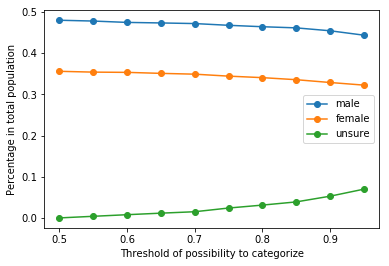

In [5]:
 plot(output)